In [43]:
message_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
meme = 1
overlap = set(message_ids) & set([meme])
overlap

{1}

In [3]:
import numpy as np

GAMMA = sorted(list(10.0 ** (np.arange(-4, 0))))
GAMMA

[0.0001, 0.001, 0.01, 0.1]

In [24]:
import random

a = [1, 2, 3]
random.choices(a, weights=[3, 2, 1], k=1)

[1]

In [30]:
[i for i, val in enumerate(a) if val == 4]

[]

## Test resolving overlap v3.2
[2551, 251, 2743, 684] --> 244

2023-10-13_15:14:56-simsom.utils-INFO-   Before (244): [251, 2226, 2403, 1899, 253, 1145, 1229, 340, 778]

2023-10-13_15:14:56-simsom.utils-INFO-   Before populr: [3, 1, 1, 1, 1, 1, 1, 1, 1]

2023-10-13_15:14:56-simsom.utils-INFO-Resolving overlap: {251}..

2023-10-13_15:14:56-simsom.utils-INFO-   After (244): [2551, 251, 2743, 684, 2226, 2403, 1899, 253, 1145, 1229, 340, 778]

2023-10-13_15:14:56-simsom.utils-INFO-   After populr: [1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Another test case 
[1283, 2782, 2924, 201] --> 73

2023-10-13_15:14:56-simsom.utils-INFO-   Before (73): [659, 1561, 1805, 201, 1939, 1271, 1283, 1298, 1464, 409, 705, 841]

2023-10-13_15:14:56-simsom.utils-INFO-   Before populr: [2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]

2023-10-13_15:14:56-simsom.utils-INFO-Resolving overlap: {201, 1283}..

2023-10-13_15:14:56-simsom.utils-INFO-   After (73): [1283, 2782, 2924, 201, 659, 1561, 1805, 1939, 1271, 1298, 1464, 409, 705, 841]

2023-10-13_15:14:56-simsom.utils-INFO-   After populr: [2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [23]:
def _handle_oversized_feed(newsfeed, alpha):
    """
    Handles oversized newsfeed and message extinction
    Returns the newsfeed (tuple of lists) where the oldest message is removed
    Input:
        feed (tuple - (list of int, list of int)): (list of mess_ids - list of popularities), represents an agent's news feed
    """
    message_ids, metadata = newsfeed
    updated_feed = (message_ids[:alpha], metadata[:alpha])

    # b: We don't want to remove forgotten messages (because we need to keep track of their exposure cascade)
    # Extinction: remove oldest (forgotten) messages from master lists
    # for message_id in set(message_ids[self.alpha :]):
    #     _ = self.message_metadata.pop(message_id, "No Key found")
    #     _ = self.all_messages.pop(message_id, "No Key found")
    assert len(updated_feed[0]) <= alpha

    return updated_feed

In [39]:
alpha = 4


def resolve(target_id, new_message_ids, popularity):
    messages, metadata = deepcopy(agent_feeds[target_id])

    print(f"Before deletion: {messages}")
    print(f"before populr: {metadata}\n")

    # check overlap with existing messages
    overlap = set(new_message_ids) & set(messages)
    if len(overlap) > 0:
        for message_id in overlap:
            print(f"resolving {message_id}")
            idx = messages.index(message_id)
            del messages[idx]
            curr_populr = metadata.pop(idx)
            print(f"current popularity: {curr_populr}")
            print(f"After deletion: {messages}")
            print(f"after populr: {metadata}")
            # update popularity
            jdx = new_message_ids.index(message_id)
            popularity[jdx] += curr_populr

    # push new messages into the feed
    print(f"Pushed to beginning: {new_message_ids}")
    print(f"Pushed populr: {popularity}")

    messages[0:0] = new_message_ids
    metadata[0:0] = popularity

    newsfeed = (messages, metadata)

    # clip the agent's feed if exceeds alpha
    if len(newsfeed[0]) > alpha:
        newsfeed = _handle_oversized_feed(newsfeed, alpha=10)
    # agent_feeds[target_id] = newsfeed
    return newsfeed

In [40]:
from copy import deepcopy

agent_feeds = dict()
agent_feeds["Fil"] = (
    [251, 2226, 2403, 1899, 253, 1145, 1229, 340, 778],
    [3, 1, 1, 1, 1, 1, 1, 1, 1],
)
target_id = "Fil"
message_ids = [2551, 251, 2743, 684]
popularity = [1, 1, 1, 1]
messages, metadata = deepcopy(agent_feeds[target_id])

In [41]:
feed = resolve(target_id, message_ids, popularity)
feed

Before deletion: [251, 2226, 2403, 1899, 253, 1145, 1229, 340, 778]
before populr: [3, 1, 1, 1, 1, 1, 1, 1, 1]

resolving 251
current popularity: 3
After deletion: [2226, 2403, 1899, 253, 1145, 1229, 340, 778]
after populr: [1, 1, 1, 1, 1, 1, 1, 1]
Pushed to beginning: [2551, 251, 2743, 684]
Pushed populr: [1, 4, 1, 1]


([2551, 251, 2743, 684, 2226, 2403, 1899, 253, 1145, 1229],
 [1, 4, 1, 1, 1, 1, 1, 1, 1, 1])

## Check bulk_add message

In [21]:
def _handle_oversized_feed(newsfeed, alpha):
    """
    Handles oversized newsfeed and message extinction
    Returns the newsfeed (tuple of lists) where the oldest message is removed
    Input:
        feed (tuple - (list of int, list of int)): (list of mess_ids - list of popularities), represents an agent's news feed
    """
    message_ids, metadata = newsfeed
    updated_feed = (message_ids[:alpha], metadata[:alpha])

    # b: We don't want to remove forgotten messages (because we need to keep track of their exposure cascade)
    # Extinction: remove oldest (forgotten) messages from master lists
    # for message_id in set(message_ids[self.alpha :]):
    #     _ = self.message_metadata.pop(message_id, "No Key found")
    #     _ = self.all_messages.pop(message_id, "No Key found")
    assert len(updated_feed[0]) <= alpha

    return updated_feed

In [22]:
from copy import deepcopy

agent_feeds = dict()
agent_feeds["Fil"] = ([1, 2, 3, 4, 5], [1, 1, 1, 1, 1])
target_id = "Fil"
message_ids = [2, 100]
popularity = [1, 1]
messages, metadata = deepcopy(agent_feeds[target_id])

In [20]:
messages

[1, 2, 3, 4, 5]

In [66]:
# check overlap with existing messages
overlap = set(message_ids) & set(messages)
print(overlap)
if len(overlap) > 0:
    for message_id in overlap:
        idx = messages.index(message_id)
        del messages[idx]
        del metadata[idx]
        # update popularity
        jdx = message_ids.index(message_id)
        popularity[jdx] += 1

{2}


In [67]:
# push new messages into the feed
messages[0:0] = message_ids
metadata[0:0] = popularity

newsfeed = (messages, metadata)
newsfeed

([2, 100, 1, 3, 4, 5], [2, 1, 1, 1, 1, 1])

In [68]:
alpha = 4
if len(newsfeed[0]) > alpha:
    newsfeed = _handle_oversized_feed(newsfeed, alpha=alpha)
newsfeed

([2, 100, 1, 3], [2, 1, 1, 1])

In [36]:
c[2] += 1
c

[2, 4, 101]

In [33]:
c[2] = 100
c

[2, 4, 100]

In [31]:
c = [2, 4, 5]
set(c) & set(a)

{2}

In [28]:
item_index = np.where(a == 4)
item_index

(array([], dtype=int64),)

In [25]:
import numpy as np

b = [2, 2, 4]
np.multiply(a, b)

array([ 2,  4, 12])

In [22]:
a = [1, 2, 3]
a[0:0] = [100, 100]
a

[100, 100, 1, 2, 3]

### Test quality distribution

In [20]:
import datetime
import time

start = datetime.datetime.now()
time.sleep(60)
end = datetime.datetime.now()
print(end - start)

0:01:00.005833


In [1]:
import numpy as np


def inverse_sampling(exponent=2):
    u = np.random.uniform(0, 1)
    human_fitness = 1 - (1 - u) ** (1 / exponent)
    return human_fitness

In [6]:
samples = [inverse_sampling(exponent=2) for _ in range(100000)]

Text(0, 0.5, 'Frequency')

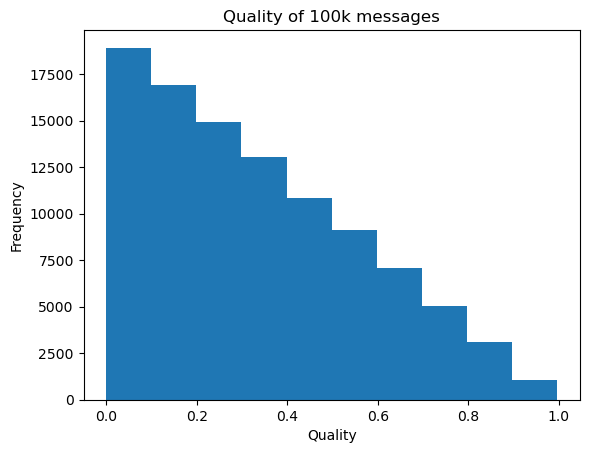

In [12]:
import matplotlib.pyplot as plt

plt.hist(samples, bins=10)
# plt.yscale("log")
plt.title("Quality of 100k messages")
plt.xlabel("Quality")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

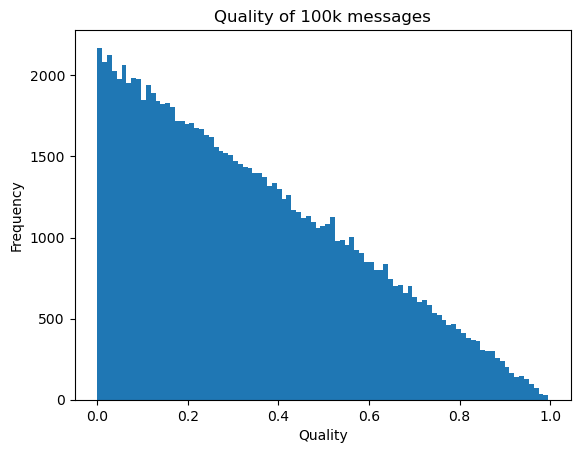

In [13]:
import matplotlib.pyplot as plt

plt.hist(samples, bins="rice")
# plt.yscale("log")
plt.title("Quality of 100k messages")
plt.xlabel("Quality")
plt.ylabel("Frequency")

### Test lifetime

In [15]:
def expon_life_time(scale_parameter=0.39):
    random_numbers = np.ceil(np.random.exponential(scale_parameter))
    return random_numbers


samples = [expon_life_time() for _ in range(100000)]

Text(0, 0.5, 'Frequency')

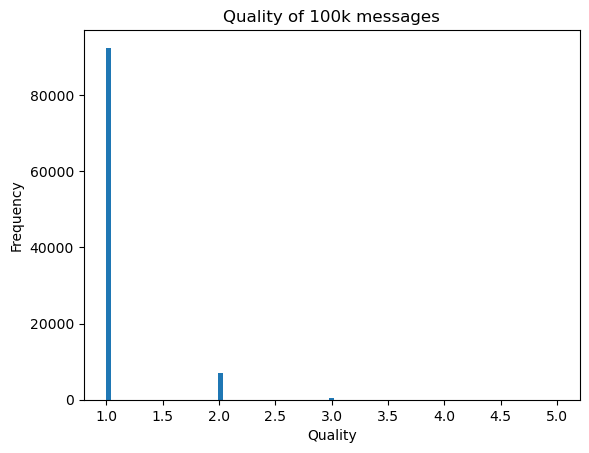

In [16]:
import matplotlib.pyplot as plt

plt.hist(samples, bins="rice")
# plt.yscale("log")
plt.title("Quality of 100k messages")
plt.xlabel("Quality")
plt.ylabel("Frequency")

### Test config

In [1]:
import numpy as np

sorted(list(10.0 ** (np.arange(-4, 0))))

[0.0001, 0.001, 0.01, 0.1]

In [2]:
import json
import simsom.utils as utils

In [7]:
import os

ABS_PATH = "experiments"
CONFIG_PATH = os.path.join(ABS_PATH, "config")

config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_gamma"
# get network names corresponding to the strategy
EXPS = json.load(open(config_fname, "r"))[exp_type]

EXP_NOS = [exp for exp in EXPS.keys() if "3" in exp]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}

In [8]:
EXP2NET

{'None3': '30',
 'hubs3': '31',
 'partisanship3': '32',
 'conservative3': '33',
 'liberal3': '34',
 'misinformation3': '35'}

In [9]:
PHI_SWIPE = list(np.arange(0, 1.1, 0.1))

In [10]:
PHI_SWIPE

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [10]:
import json
import simsom.utils as utils

ABS_PATH = "experiments"
CONFIG_PATH = os.path.join(ABS_PATH, "config")

config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_thetaphi"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

# VARY THETA 1,4,16,64
# keep others constant - ($\gamma=10^{-3}$) and no deception ($\phi=0$)
PHI = "0"
EXP_NOS = [exp for exp in EXPS.keys() if exp[1] == PHI]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}

In [11]:
len(EXP2NET)

7

In [ ]:
import simsom.config_vals as config_vals

config_vals.PHI_SWIPE.index[]

In [12]:
EXP2NET

{'00': '20',
 '10': '20',
 '20': '20',
 '30': '20',
 '40': '20',
 '50': '20',
 '60': '20'}

In [15]:
exp_type = "vary_thetagamma"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

# VARY GAMMA
# keep others constant - ($\theta=1$) or deception ($\phi=0$)
THETA = "0"
EXP_NOS = [exp for exp in EXPS.keys() if exp[0] == THETA]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}
EXP2NET

{'00': '00', '01': '10', '02': '20', '03': '30'}

In [16]:
exp_type = "vary_phigamma"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

# VARY PHI
# keep others constant - ($\gamma=10^{-3}$) and no flooding ($\theta=1$)
GAMMA = "1"
EXP_NOS = [exp for exp in EXPS.keys() if exp[1] == GAMMA]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}
EXP2NET

{'01': '10',
 '11': '10',
 '21': '10',
 '31': '10',
 '41': '10',
 '51': '10',
 '61': '10',
 '71': '10',
 '81': '10',
 '91': '10'}

In [3]:
import simsom.config_vals as config_vals

config_vals.THETA_SWIPE

[1, 2, 4, 8, 16, 32, 64]

In [4]:
len(config_vals.THETA_SWIPE)

7

In [7]:
import os

In [17]:
import json
import simsom.utils as utils

# import simsom.config_vals as config_vals

# config_vals.THETA_SWIPE # [1, 2, 4, 8, 16, 32, 64]

ABS_PATH = "experiments"
CONFIG_PATH = os.path.join(ABS_PATH, "config")

config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_thetaphi"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

MAXTHETA_IDX = 5  # 2^5 = 32
EXP_NOS = [exp for exp in EXPS.keys() if int(exp[0]) <= MAXTHETA_IDX]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}

In [18]:
EXP2NET

{'00': '20',
 '01': '20',
 '02': '20',
 '03': '20',
 '04': '20',
 '05': '20',
 '06': '20',
 '07': '20',
 '08': '20',
 '09': '20',
 '010': '20',
 '10': '20',
 '11': '20',
 '12': '20',
 '13': '20',
 '14': '20',
 '15': '20',
 '16': '20',
 '17': '20',
 '18': '20',
 '19': '20',
 '110': '20',
 '20': '20',
 '21': '20',
 '22': '20',
 '23': '20',
 '24': '20',
 '25': '20',
 '26': '20',
 '27': '20',
 '28': '20',
 '29': '20',
 '210': '20',
 '30': '20',
 '31': '20',
 '32': '20',
 '33': '20',
 '34': '20',
 '35': '20',
 '36': '20',
 '37': '20',
 '38': '20',
 '39': '20',
 '310': '20',
 '40': '20',
 '41': '20',
 '42': '20',
 '43': '20',
 '44': '20',
 '45': '20',
 '46': '20',
 '47': '20',
 '48': '20',
 '49': '20',
 '410': '20',
 '50': '20',
 '51': '20',
 '52': '20',
 '53': '20',
 '54': '20',
 '55': '20',
 '56': '20',
 '57': '20',
 '58': '20',
 '59': '20',
 '510': '20'}

In [19]:
len(EXP2NET)

66

In [20]:
quality = [0.03869747735035958, 0.04124961485247064, 0.04368297274331458]
np.mean(quality)

0.041210021648714935

In [21]:
np.mean(quality) / 0.48

0.08585421176815612

In [15]:
import json
import simsom.utils as utils
import os

# import simsom.config_vals as config_vals

# config_vals.THETA_SWIPE # [1, 2, 4, 8, 16, 32, 64]

ABS_PATH = "experiments"
CONFIG_PATH = os.path.join(ABS_PATH, "config")

config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_thetaphi"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

MAXTHETA_IDX = 2  # 2^5 = 32
EXP_NOS = [exp for exp in EXPS.keys() if int(exp[0]) > MAXTHETA_IDX]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}
EXP2NET

{'30': '20',
 '31': '20',
 '32': '20',
 '33': '20',
 '34': '20',
 '35': '20',
 '36': '20',
 '37': '20',
 '38': '20',
 '39': '20',
 '310': '20',
 '40': '20',
 '41': '20',
 '42': '20',
 '43': '20',
 '44': '20',
 '45': '20',
 '46': '20',
 '47': '20',
 '48': '20',
 '49': '20',
 '410': '20',
 '50': '20',
 '51': '20',
 '52': '20',
 '53': '20',
 '54': '20',
 '55': '20',
 '56': '20',
 '57': '20',
 '58': '20',
 '59': '20',
 '510': '20',
 '60': '20',
 '61': '20',
 '62': '20',
 '63': '20',
 '64': '20',
 '65': '20',
 '66': '20',
 '67': '20',
 '68': '20',
 '69': '20',
 '610': '20'}

In [16]:
import json
import simsom.utils as utils
import os

# import simsom.config_vals as config_vals

# config_vals.THETA_SWIPE # [1, 2, 4, 8, 16, 32, 64]

ABS_PATH = "experiments"
CONFIG_PATH = os.path.join(ABS_PATH, "config")

config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_thetaphi"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

MAXTHETA_IDX = 2  # 2^5 = 32
EXP_NOS = [exp for exp in EXPS.keys() if int(exp[0]) <= MAXTHETA_IDX]
EXP2NET_ = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}

In [17]:
set(EXP2NET.keys()) & set(EXP2NET_.keys())

set()

In [7]:
config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_phigamma"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

MAXPHI_IDX = 4  # 2^5 = 32

EXP_NOS = [exp for exp in EXPS.keys() if int(exp[0]) > MAXPHI_IDX]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}

In [9]:
len(EXP2NET)

20

In [12]:
config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_phigamma"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

MAXPHI_IDX = 4  # 2^5 = 32

EXP_NOS = [exp for exp in EXPS.keys() if int(exp[0]) > MAXPHI_IDX]
EXP2NET_ = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}

In [13]:
config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_phigamma"

# get names for exp_config and network
EXPS = json.load(open(config_fname, "r"))[exp_type]

MAXPHI_IDX = 4  # 2^5 = 32

EXP_NOS = [exp for exp in EXPS.keys() if int(exp[0]) <= MAXPHI_IDX]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}
len(EXP2NET)

24

In [14]:
set(EXP2NET.keys()) & set(EXP2NET_.keys())

set()

### cascade exps 

In [71]:
import os
import json
import simsom.utils as utils

ABS_PATH = "experiments"
CONFIG_PATH = os.path.join(ABS_PATH, "config")

config_fname = os.path.join(CONFIG_PATH, "all_configs.json")
exp_type = "vary_phigamma"
GAMMA = "2"  # index of gamma (0.1)
PHI = ["0", "1"]
# get network names corresponding to the strategy
EXPS = json.load(open(config_fname, "r"))[exp_type]

EXP_NOS = [exp for exp in EXPS.keys() if (exp[1] == GAMMA) and (exp[0] in PHI)]
EXP2NET = {
    exp_name: utils.netconfig2netname(config_fname, net_cf)
    for exp_name, net_cf in EXPS.items()
    if exp_name in EXP_NOS
}

In [72]:
EXP2NET

{'02': '20', '12': '20'}

In [74]:
for exp_no in EXP2NET.keys():
    configfile = os.path.join(CONFIG_PATH, exp_type, f"{exp_no}.json")
    config = json.load(open(configfile))
    print(config)

{'phi': 0.0, 'gamma': 0.01, 'beta': 0.05, 'targeting_criterion': None, 'verbose': False, 'human_network': 'follower_network.gml', 'output_cascades': True, 'epsilon': 0.0001, 'rho': 0.8, 'mu': 0.5, 'alpha': 15, 'theta': 1}
{'phi': 0.1, 'gamma': 0.01, 'beta': 0.05, 'targeting_criterion': None, 'verbose': False, 'human_network': 'follower_network.gml', 'output_cascades': True, 'epsilon': 0.0001, 'rho': 0.8, 'mu': 0.5, 'alpha': 15, 'theta': 1}
